In [1]:
from CompilerQC import *
import pickle
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import itertools
import shutil
from visualize_graphs import (
    without_compilation,
    advanced_plot_df,
    plot_settings_in_subplot,
)

In [2]:
# group settings by hand
number = 3
results = []
for idx, name in enumerate(
    os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
):
    print(idx, name)
    results.append(name.split(".")[0])

i = 0
for name in os.listdir(paths.parameters_path / f"run_{number}/dictionaries")[
    i : (i + 1)
]:
    print(name)
    with open(paths.parameters_path / f"run_{number}/dictionaries/{name}", "rb") as f:
        new_dicts = pickle.load(f)
        for idx, setting in enumerate(new_dicts):
            print(f"=========={idx}=============")
            for k, v in setting.items():
                print(k, v)

0 BestSettings3.pkl
BestSettings3.pkl
==========0=============
with_core False
==========1=============
energy.all_constraints True
energy.scaling_model LHZ
==========2=============
with_core False
energy.all_constraints True
energy.scaling_model LHZ
==========3=============
length_of_node_weight 0.1
==========4=============
length_of_node_weight 0.5
==========5=============
length_of_node_weight 0.9


In [3]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

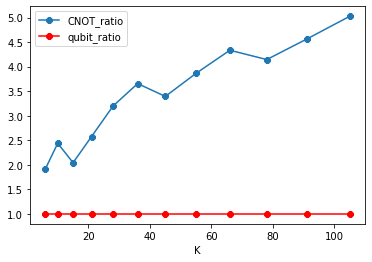

In [4]:
problem_folder = "lhz"
without_compilation(problem_folder)["CNOT_ratio"].plot(marker="8", label="CNOT_ratio")
without_compilation(problem_folder)["qubit_ratio"].plot(
    marker="8", color="red", label="qubit_ratio"
)
plt.legend()

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

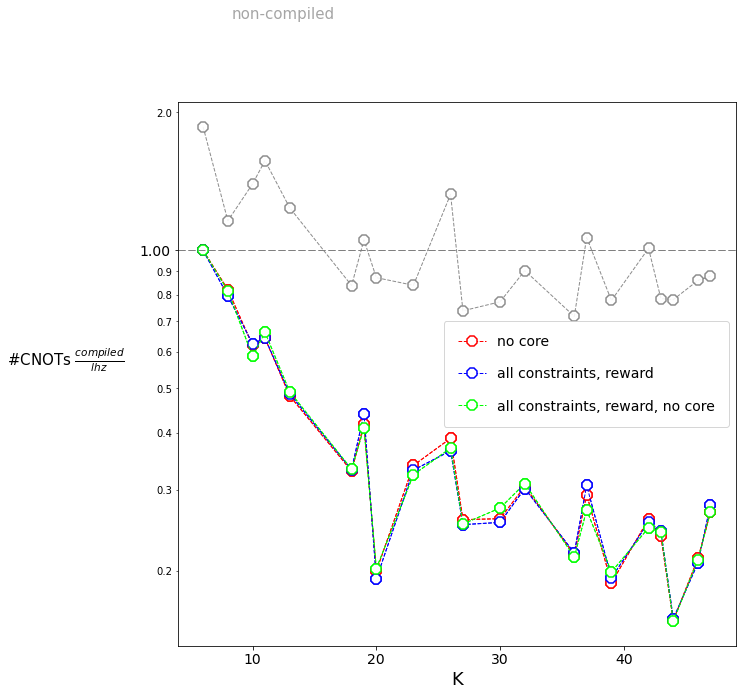

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "Scope vs MoI"
legend_title = ""
setting_numbers = [0, 1, 2]
setting_names = [
    "no core",
    "all constraints, reward",
    "all constraints, reward, no core",
]
name = "BestSettings3"
advanced_plot_df(
    df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax
)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
)

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

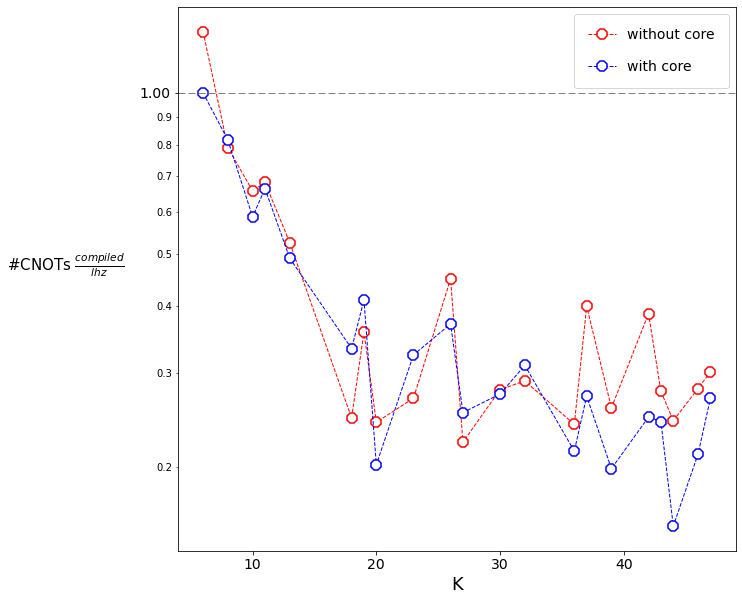

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "core vs no core"
legend_title = ""
setting_numbers = [0, 5]
setting_names = [
    "without core",
    "with core",
]
name = "BestSettings3"
advanced_plot_df(
    df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax
)